In [1]:
#!pip install numpy
%load_ext autoreload
%autoreload 2
#import pgl
from pgl import pgl as pglLibrary
from pgl import screen as pglScreen
from pgl import task as pglTask
import numpy as np
import sys
from PIL import Image
import matplotlib.pyplot as plt
print(sys.version)

3.13.5 (main, Jun 11 2025, 15:36:57) [Clang 17.0.0 (clang-1700.0.13.3)]


In [2]:
pgl = pglLibrary()
#pgl.verbose=2
#pgl.open(0,880, 600)
pgl.open(0,880, 600)
#pgl.open()
pgl.visualAngle(57,40,30)
#pgl.getWindowFrameInDisplay()
#print(pgl.screenX.pix)
#print(pgl.screenY.pix)
#print(pgl.screenWidth)
#print(pgl.screenHeight)
#pgl.setWindowFrameInDisplay(1, 100, 100, 800, 600)
#pgl.verbose = 1
pgl.getResolution()
#pgl.getWindowFrameInDisplay()
#pgl.setResolution(0, 1920, 1200, 120, 32)
#pgl.setResolution(0, 3840, 1080, 60, 32)
#pgl.setResolution(0, 1512, 982, 60, 32)
#pgl.checkOS()
#help(pgl.checkOS)
#pgl.getNumDisplaysAndDefault()


(pgl:checkOS) Running on MacBook Pro (MacBookPro18,3) with macOS version: 15.5
(pgl:checkOS) Apple M1 Pro Cores: 8 (6 performance and 2 efficiency) Memory: 32 GB
(pgl:checkOS) GPU: Apple M1 Pro (Built-In) 14 cores, Metal 3 support
(pgl:checkOS)   Color LCD [Main Display]: 3024 x 1964 Retina (Built-in Liquid Retina XDR Display)
(pgl:checkOS)   BenQ EX2780Q: 2560 x 1440 (QHD/WQHD - Wide Quad High Definition) (Unknown type)
(pglBase) Verbosity level set to 1
(pglBase) Main library instance created
(pglBase:open) Starting mglMetal application: /Users/justin/Library/Developer/Xcode/DerivedData/Build/Products/Debug/mglMetal.app
(pglBase:open) Using socket with address: /Users/justin/Library/Containers/gru.mglMetal/Data/pglMetal.socket.7OWHORuvkX
(pgl:_pglComm) .Connected to: /Users/justin/Library/Containers/gru.mglMetal/Data/pglMetal.socket.7OWHORuvkX
(pgl:_resolution:getResolution) Display 0/2: 1512x982 120Hz 32bits


(1512, 982, 120, 32)

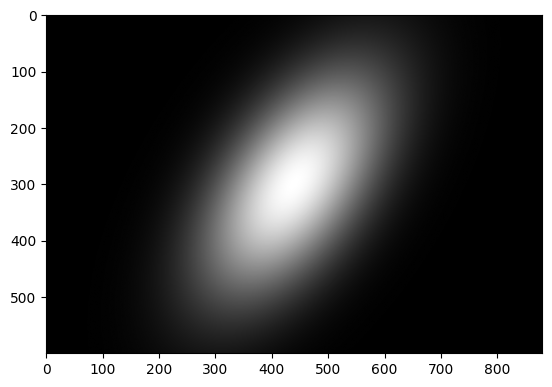

In [34]:
grating = pgl.grating(spatialFrequency=0.1,phase=0, contrast=1)
gaussian = pgl.gaussian(contrast=1,stdX=30/4,orientation=60)
#print(pgl.xDeg2pix)
#pgl.close()
#plt.imshow(grating, cmap='gray', vmin=-1, vmax=1)
#$plt.imshow(gaussian * grating, cmap='gray', vmin=-1, vmax=1)
plt.imshow(gaussian, cmap='gray', vmin=0, vmax=1)

#print(gaussian)

In [ ]:
pgl.profileModeClearAll()
#pgl.fullScreen(True)
_,_,frameRate,_ =pgl.getResolution()
print(frameRate)
pgl.profileMode = 2
#print(pgl.profileMode)
#print(pgl.profileModeBufferSize )
pgl.clearScreen([0,0,0])
pgl.flush()
for i in range(frameRate*1):
    pgl.dots(np.random.uniform(-20,20),np.random.uniform(-15,15))
    #pgl.printCommandResults()
    pgl.flush()
pgl.profileMode = 0
#pgl.fullScreen(False)
pgl.profileModeDisplay()


In [ ]:
_,_,frameRate,_ =pgl.getResolution()
pgl.profileModeClearAll()
pgl.batchStart()
for i in range(frameRate*5):
    #im.display()
    pgl.dots(np.random.uniform(-20,20),np.random.uniform(-15,15))
    #pgl.printCommandResults()
    #pgl.printCommandResults()


    pgl.flush()
    #pgl.printCommandResults()
#pgl.batchRun()
#pgl.batchEnd()

In [ ]:
pgl.batchRun()
pgl.batchEnd()
pgl.profileModeDisplay()

In [ ]:
im = Image.open('/Users/justin/proj/pgl/testimage.jpg')
im = im.convert('RGBA')
#im = im.resize((300, 200))
imData = np.array(im)/255.0
#print(imData)

In [ ]:
im = pgl.imageCreate(imData)
im.print()

In [ ]:
pgl.clearScreen(np.random.rand(3))
im.print()
im.display()
pgl.flush()

In [ ]:
pgl.clearScreen(np.random.rand(3))
pgl.flush()
pgl.close()

In [ ]:
#commandResults = pgl.profileModeCommandResults
#print(commandResults[0])
#commandResults = pgl.profileList[0].get('commandResults', 'None')
#print(commandResults['processedTime'])
#print(list(pgl.profileList[0].keys()))
pgl.flush()
pgl.printCommandResults()

In [ ]:
pgl.visualAngle(57,40,30)
print(pgl.screenWidth)
print(pgl.screenHeight)
#pgl.printCommandResults()
#print(pgl.xform)
pgl.clearScreen([0,0,0])
pgl.dots(np.random.uniform(-20,20),np.random.uniform(-15,15))
pgl.printCommandResults()
pgl.flush()

In [ ]:
from pprint import pprint


pprint(pgl.gpuInfo)


In [ ]:
(screenWidth, screenHeight, refreshRate, bitDepth) = pglDisplayInfo.getResolution(1)
print(f"screenResolution: {screenWidth}x{screenHeight} refreshRate: {refreshRate} bitDepth: {bitDepth}")

pglDisplayInfo.setResolution(1, screenWidth, screenHeight, refreshRate, bitDepth)

Install pgl library

In [ ]:
pgl = pglLibrary()
pgl.getResolution(0)


Instal screen and task

In [ ]:
#init screen
s = pglScreen();
s.helloworld();

# init task
t = pglTask();
t.helloworld();


In [ ]:
# start MATLAB
import matlab.engine
eng = matlab.engine.start_matlab()

# add mgl to path
eng.addpath(eng.genpath("/Users/justin/proj/mgl"),nargout=0)


In [ ]:
# mgl from python using mgl engine test
eng.eval("mglOpen;",nargout=0)
eng.eval("mglVisualAngleCoordinates(57,[16,24]);",nargout=0)
eng.eval("mglClearScreen([0.3 0.7 0.2]);",nargout=0)
eng.eval("mglTextDraw('Hello World!',[0 0]);",nargout=0)
eng.eval("mglFlush;",nargout=0)
eng.eval("mglWaitSecs(3);",nargout=0)
eng.eval("mglClose;",nargout=0)

